## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
%matplotlib inline

## Loading the dataset

In [2]:
#zf_train = zipfile.ZipFile('data/train.json')
df_train = pd.read_json('data/train.json')

## Overview of the dataset

In [3]:
print(df_train)
df_train = df_train.drop('id', axis = 1)

          id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]


In [4]:
print(df_train.head())
print(df_train.shape)

       cuisine                                        ingredients
0        greek  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian                [water, vegetable oil, wheat, salt]
4       indian  [black pepper, shallots, cornflour, cayenne pe...
(39774, 2)


## What are the cuisines in the dataset

In [5]:
cuisines = df_train.cuisine.unique()
print(cuisines)
print(cuisines.shape)

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']
(20,)


## Plotting the cuisine versus number of examples of that cuisine

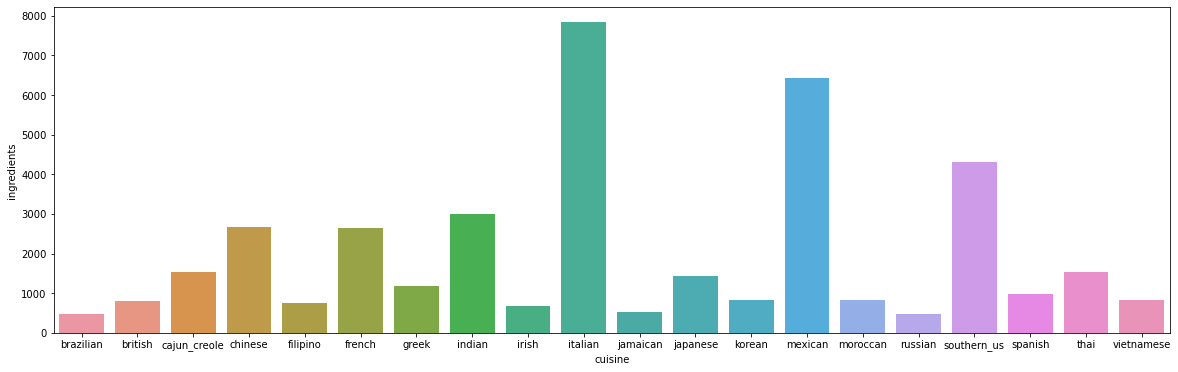

In [6]:
fig = plt.figure()
fig.set_size_inches(20, 6)
#sns.barplot(data = df_train.groupby('cuisine').count())
sns.barplot(data = df_train.groupby('cuisine').count(), x = df_train.groupby('cuisine').count().index, y = 'ingredients')

## Finding which ingredients are available in a cuisine

In [7]:
cuisine_ingredients = {}
for i, cuisine in enumerate(cuisines):
    df = df_train[df_train['cuisine'] == cuisine]
    ingredients = []
    df['ingredients'].apply(lambda x : ingredients.extend(x))
    ingredients = np.array(ingredients)
    unique_ingredients = np.unique(list(ingredients))
    cuisine_ingredients[cuisine] = unique_ingredients
# print(cuisine_ingredients)
# print( ingredients)

## Total different types of ingredients used in all of the cuisines

In [8]:
total_ingredients = []
for cuisine, ingredients in cuisine_ingredients.items():
    total_ingredients.extend(ingredients)
print(len(total_ingredients))
total_different_ingredients = list(np.unique(np.array(total_ingredients)))
print("Total different types of ingredients :", len(total_different_ingredients))

29179
Total different types of ingredients : 6714


## Make every ingredient a column in the dataset

In [9]:
def make_columns(dataframe):
    for ingredient in total_different_ingredients:
        dataframe[ingredient] = 0
    return dataframe

df_train = make_columns(df_train)
print(df_train.shape)

(39774, 6716)


In [10]:
df_train

,cuisine,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filling the columns according to the ingredients of the reciepies

In [11]:
def fill_columns(dataframe):
    for index, row in dataframe.iterrows():
        ingredients = row['ingredients']
       # print(index)
        for ingredient in ingredients:
            if ingredient in total_different_ingredients:
                dataframe.at[index, ingredient] = 1
    return dataframe

df_train = fill_columns(df_train)

## Finding the ingredients who are present in at least 2 percent receipies of a particular cuisine

In [12]:
df_grouped = df_train.groupby('cuisine').mean()
df_grouped

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006424,0.000000
british,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003731,0.000000
cajun_creole,0.000647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008409,0.000000
chinese,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000374,0.000000,0.000000,0.000000,0.011223,0.000000
filipino,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002649,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007947,0.000000
french,0.000378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000378,0.000378,...,0.015495,0.000000,0.000000,0.000000,0.000000,0.000000,0.001890,0.000000,0.032502,0.000000
greek,0.000000,0.000000,0.000000,0.000851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003404,0.000000,0.000000,0.000000,0.001702,0.000851,0.001702,0.002553,0.040000,0.000000
indian,0.000000,0.000666,0.000000,0.000000,0.000333,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013986,0.000000
irish,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002999,0.000000,0.000000,...,0.035982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005997,0.000000


In [13]:
keep_percent = .2
top_cuisine_ingredients = {}
for cuisine in cuisines:
    a = df_grouped.loc[cuisine, :].sort_values() < keep_percent
    a = a[a == True]
    top_cuisine_ingredients[cuisine] = a.index

top_ingredients = []
for cuisine, ingredients in top_cuisine_ingredients.items():
    top_ingredients.extend(ingredients)
    
top_ingredients = np.array(top_ingredients)
unique_top_ingredients = ['cuisine']
unique_top_ingredients.extend(list(np.unique(top_ingredients)))
print(len(unique_top_ingredients))

6714


In [14]:
df_train = df_train[unique_top_ingredients]
print(df_train.shape)

(39774, 6714)


## Top 5 ingredient in each cuisine

In [15]:
temp = df_train.groupby('cuisine').mean()

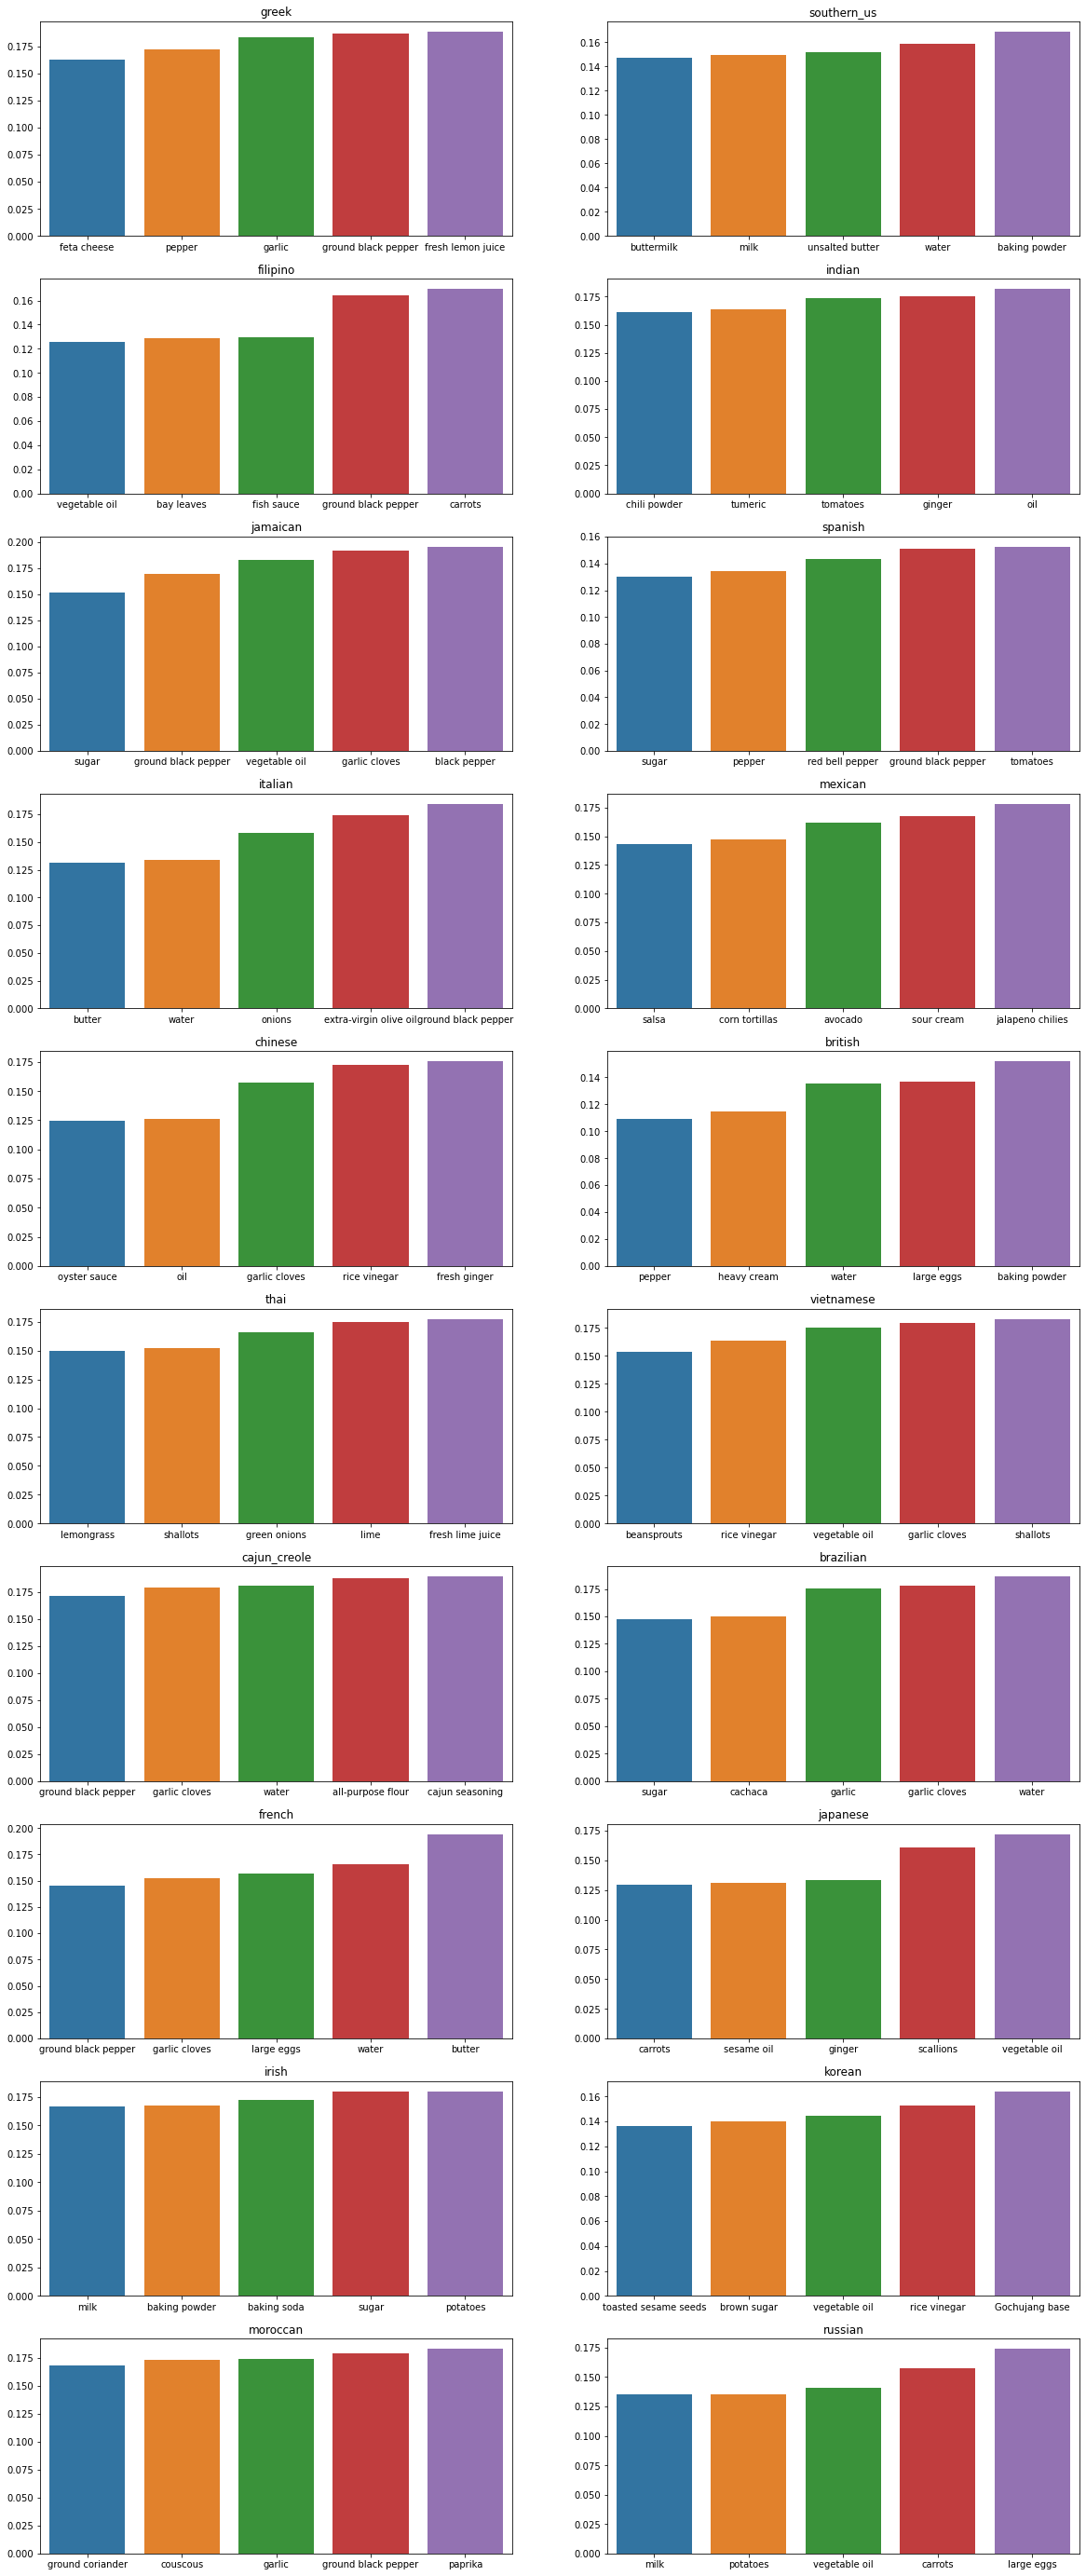

In [16]:
fig, ax = plt.subplots(10, 2)
ax = ax.flatten()
fig.set_size_inches(20, 50)
for index, cuisine in enumerate(cuisines):
    ax[index].title.set_text(cuisine)
    sns.barplot(x = top_cuisine_ingredients[cuisine][:-1][-5:], y = temp.loc[cuisine][top_cuisine_ingredients[cuisine]].values[:-1][-5:], ax = ax[index])

## Importing the Machine Learning Libraries

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [18]:
Y = df_train.cuisine
X = df_train.drop(['cuisine'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 75).fit(X_train, y_train)
test_predictions = rf.predict(X_test)
train_predictions = rf.predict(X_train)
#print("height is ", height)
print("Training Accuracy is : ", sum(train_predictions==y_train)/y_train.shape[0])
print("Testing Accuracy is : ", sum(test_predictions==y_test)/y_test.shape[0])

## Preprocessing the test data

In [ ]:
# zf_test = zipfile.ZipFile('/kaggle/input/whats-cooking/test.json.zip')
# df_test = pd.read_json(zf_test.open('test.json'))
df_test.head()

In [ ]:
df_test = make_columns(df_test)
df_test.head()

In [ ]:
df_test = fill_columns(df_test)
df_test.head()

In [ ]:
id = df_test['id']
df_test = df_test[unique_top_ingredients[1:]]

In [ ]:
df_test.head()

In [ ]:
predictions = rf.predict(df_test)

In [ ]:
df = pd.DataFrame({'id':id, 'cuisine':predictions})

In [ ]:
df.to_csv('cooking_submission_1.csv', index = False)

# ** Direct method with python libraries instead of self made methods like make_columns and fill_columns**

In [ ]:
#zf_train = zipfile.ZipFile('/kaggle/input/whats-cooking/train.json.zip')
df_train = pd.read_json('data/train.json')

In [ ]:
df_train.head()

## Converting the list of ingredient to a string

In [ ]:
def joiningre(x):
    return ' '.join(x)
df_train['all_ingredients'] = df_train['ingredients'].apply(joiningre)

In [ ]:
df_train.head(5)

## Using count vectorizer to build the vocab and then converting the ingredients string to a sparse matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(df_train['all_ingredients'])

In [ ]:
len(count_vect.vocabulary_)

In [ ]:
df_train_transform = count_vect.transform(df_train['all_ingredients'])
print(df_train_transform)

## Converting the sparse matrix to one hot encode matrix

In [ ]:
X = df_train_transform.toarray()
Y = df_train['cuisine']
X
Y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.15)

In [ ]:
rf = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
test_predictions = rf.predict(X_test)
train_predictions = rf.predict(X_train)
print("height is ", height)
print("Training Accuracy is : ", sum(train_predictions==y_train)/y_train.shape[0])
print("Testing Accuracy is : ", sum(test_predictions==y_test)/y_test.shape[0])

In [ ]:
print(train_predictions)

## Predictions with the test data

In [ ]:
zf_test = zipfile.ZipFile('/kaggle/input/whats-cooking/test.json.zip')
#df_test = pd.read_json(zf_test.open('test.json'))
df_test = pd.read_json('data/test.json')
df_test['all_ingredients'] = df_test['ingredients'].apply(joiningre)

In [ ]:
df_test.head()

In [ ]:
df_test_transform = count_vect.transform(df_test['all_ingredients'])

In [ ]:
predictions = rf.predict(df_test_transform.toarray())
print(predictions)

In [ ]:
df = pd.DataFrame({'id':df_test.id, 'cuisine':predictions})

In [ ]:
df.to_csv('cooking_submission_2.csv', index = False)